In [1]:
import geopandas as gpd

<AxesSubplot:>

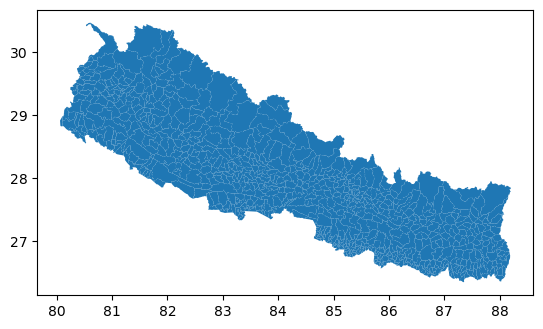

In [2]:
nepal = gpd.read_file("local_unit/Local Unit/local_unit.shp")
nepal.plot()

### Dissolve by districts

In [3]:
districts = nepal.dissolve(by = "DISTRICT")
districts

,geometry,STATE_CODE,GaPa_NaPa,Type_GN,Province
DISTRICT,,,,,
ACHHAM,"POLYGON ((81.29881 28.92455, 81.29866 28.92438...",7,Bannigadhi Jayagadh,Gaunpalika,Sudur Pashchim
ARGHAKHANCHI,"POLYGON ((83.00481 27.92912, 83.00494 27.92935...",5,Bhumekasthan,Nagarpalika,5
BAGLUNG,"POLYGON ((83.28374 28.18997, 83.28297 28.18970...",4,Badigad,Gaunpalika,Gandaki
BAITADI,"POLYGON ((80.36947 29.34978, 80.36939 29.34955...",7,Dasharathchanda,Nagarpalika,Sudur Pashchim
BAJHANG,"POLYGON ((81.02629 29.41997, 81.02607 29.42042...",7,Bithadchir,Gaunpalika,Sudur Pashchim
...,...,...,...,...,...
SYANGJA,"POLYGON ((83.48815 27.98174, 83.48843 27.98168...",4,Aandhikhola,Gaunpalika,Gandaki
TANAHU,"POLYGON ((84.42455 27.95584, 84.42485 27.95561...",4,Anbukhaireni,Gaunpalika,Gandaki
TAPLEJUNG,"POLYGON ((88.07035 27.43876, 88.07056 27.43806...",1,Aathrai Tribeni,Gaunpalika,1


### Dissolve by provinces and aggregate district count

<AxesSubplot:>

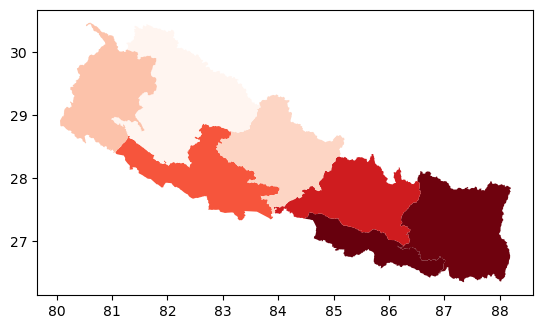

In [4]:
nepal_provinces = nepal.dissolve(by = "Province",
                                aggfunc = {"DISTRICT":"count"})
#nepal_provinces.plot(scheme = "quantiles",cmap = "Reds")
nepal_provinces.plot(column = "DISTRICT", cmap = "Reds")

### Dissolve by selection

In [5]:
my_districts = ["CHITAWAN", "KATHMANDU"]
nepal["My Districts"] = nepal["DISTRICT"].isin(my_districts)
nepal

,STATE_CODE,DISTRICT,GaPa_NaPa,Type_GN,Province,geometry,My Districts
0,1,TAPLEJUNG,Aathrai Tribeni,Gaunpalika,1,"POLYGON ((87.60985 27.37043, 87.61107 27.36943...",False
1,1,TAPLEJUNG,Maiwakhola,Gaunpalika,1,"POLYGON ((87.50402 27.42901, 87.50672 27.42831...",False
2,1,TAPLEJUNG,Meringden,Gaunpalika,1,"POLYGON ((87.51272 27.56894, 87.51255 27.56859...",False
3,1,TAPLEJUNG,Mikwakhola,Gaunpalika,1,"POLYGON ((87.68850 27.70975, 87.68891 27.70938...",False
4,1,TAPLEJUNG,Phaktanglung,Gaunpalika,1,"POLYGON ((87.83673 27.95137, 87.83735 27.95119...",False
...,...,...,...,...,...,...,...
772,4,NAWALPARASI_E,Chitawan National Park,National Park,Gandaki,"POLYGON ((84.32537 27.68957, 84.32562 27.68940...",False
773,5,RUKUM_E,Bhume,Gaunpalika,5,"POLYGON ((82.65382 28.65759, 82.65428 28.65724...",False
774,5,RUKUM_E,Putha Uttarganga,Gaunpalika,5,"POLYGON ((82.76718 28.80407, 82.76748 28.80383...",False
775,5,RUKUM_E,Sisne,Gaunpalika,5,"POLYGON ((82.67327 28.85214, 82.67373 28.85205...",False


In [6]:
my_districts = nepal.dissolve(by = "My Districts")
my_districts

,geometry,STATE_CODE,DISTRICT,GaPa_NaPa,Type_GN,Province
My Districts,,,,,,
False,"POLYGON ((81.28160 28.23536, 81.28037 28.23670...",1,TAPLEJUNG,Aathrai Tribeni,Gaunpalika,1
True,"MULTIPOLYGON (((84.53801 27.39122, 84.53824 27...",3,KATHMANDU,Budhanilakantha,Nagarpalika,Bagmati


<AxesSubplot:>

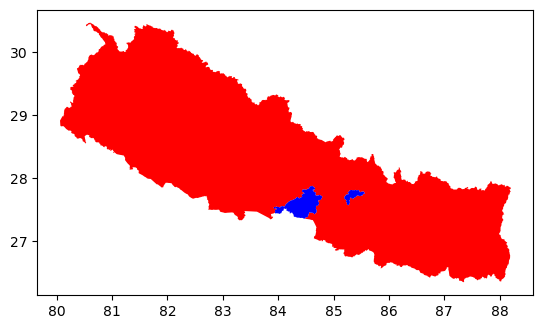

In [7]:
my_districts.plot(color = ["red", "blue"])

<AxesSubplot:>

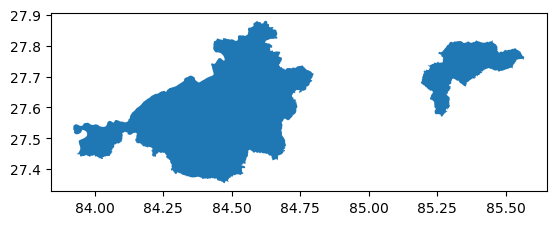

In [20]:
my_districts[my_districts.index == True].plot()

### Dissolving by zones while counting number of districts and aggregating population

C:\Users\HShrestha\Anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


<AxesSubplot:>

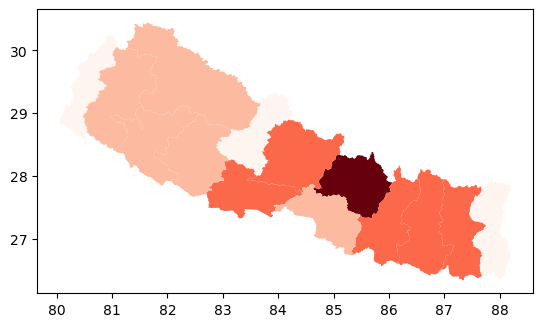

In [8]:
import geodatasets
nepal = gpd.read_file(geodatasets.get_path('geoda.nepal'))
nepal_zones = nepal.dissolve(by = "name_2",
                             aggfunc = {"district":"count",
                                 "population":"sum"})
        
nepal_zones.plot(column = "district",
                cmap = "Reds")

<AxesSubplot:>

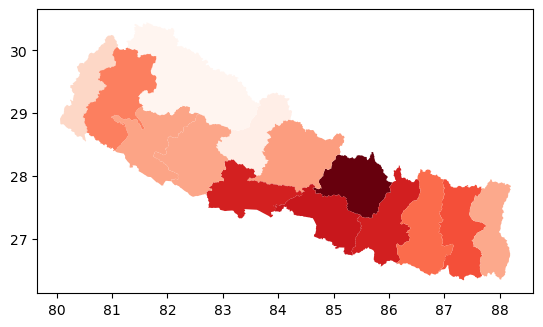

In [9]:
nepal_zones.plot(column = "population",
                cmap = "Reds")